# Importing Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pickle

# Data Preprocessing

In [6]:
df= pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.shape

(2200, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['numeric_labels']=df['label'].map(crop_dict)

In [15]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,numeric_labels
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [16]:
df['numeric_labels'].value_counts()

numeric_labels
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

# Corelation Matrix

In [17]:
Corelation_DataFrame=df.drop(['label'],axis=1)
correlation_matrix = Corelation_DataFrame.corr()

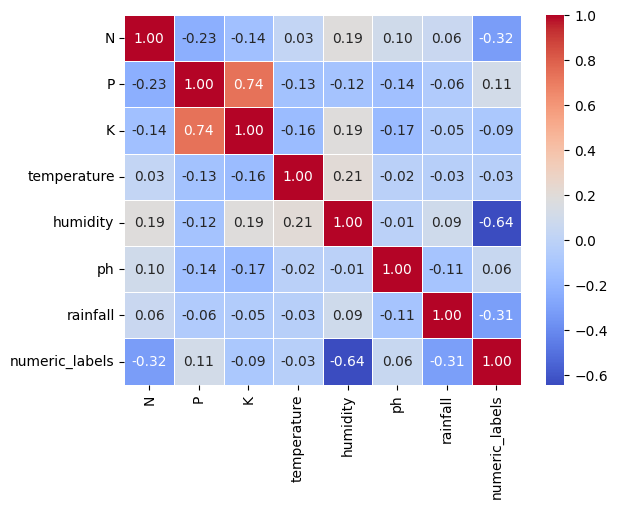

In [18]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5);

In [19]:
X = df.drop(['numeric_labels','label'],axis=1)
Y = df['numeric_labels']

In [20]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [21]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: numeric_labels, Length: 2200, dtype: int64

# Train test Split

In [22]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
X_train.shape

(1760, 7)

In [24]:
Y_train.shape

(1760,)

In [25]:
X_test.shape

(440, 7)

In [26]:
Y_test.shape

(440,)

# Training Models

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
    }

In [28]:

np.random.seed(42)
for name, model in models.items():
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    
    print(f"{name}  Model Score on Test Data : {model.score(X_test,Y_test):.4f}")

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  Model Score on Test Data : 0.9455
Support Vector Machine  Model Score on Test Data : 0.9614
K-Nearest Neighbors  Model Score on Test Data : 0.9705
Random Forest  Model Score on Test Data : 0.9932


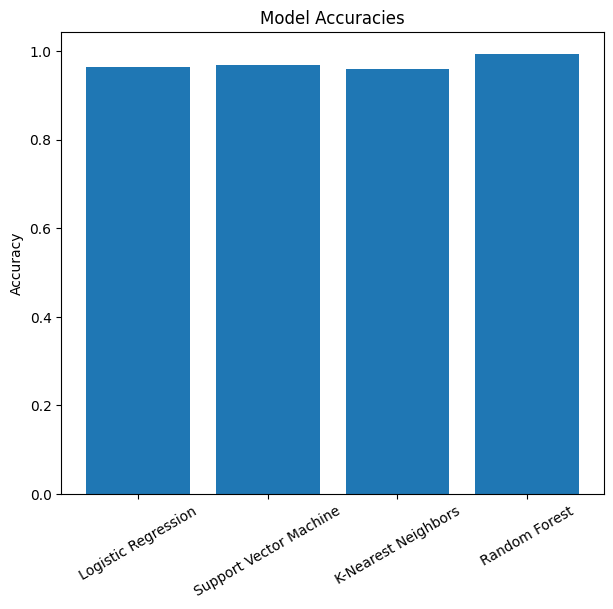

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

model_scores = {
    "Logistic Regression": 0.9636,
    "Support Vector Machine": 0.9682,
    "K-Nearest Neighbors": 0.9591,
    "Random Forest": 0.9932
}

# Create a DataFrame and transpose it
model_compare = pd.DataFrame(model_scores, index=["accuracy"]).T

# Create a bar plot
plt.figure(figsize=(7,6))
plt.bar(model_compare.index, model_compare["accuracy"])

# Adding labels and a title
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

# Add x-labels (model names)
plt.xticks(rotation=30)  # Rotate the labels for better readability

# Display the plot
plt.show()


In [30]:
#Grid Search CV (Hyper-Parameter Tuning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1000,2000],       
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],                 
}

# Create a Random Forest classifier

rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1);

rf.fit(X_train,Y_train);


In [28]:
rf.score(X_test,Y_test)

0.9931818181818182

# Evaluation on Different Metrics

In [30]:
y_pred=rf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1-score
f1 = f1_score(Y_test, y_pred, average='macro')
print(f"F1-score: {f1:.2f}")

# Calculate recall
recall = recall_score(Y_test, y_pred,average='macro')
print(f"Recall: {recall:.2f}")

# Calculate precision
precision = precision_score(Y_test, y_pred,average='macro')
print(f"Precision: {precision:.2f}")


Accuracy: 0.99
F1-score: 0.99
Recall: 0.99
Precision: 0.99


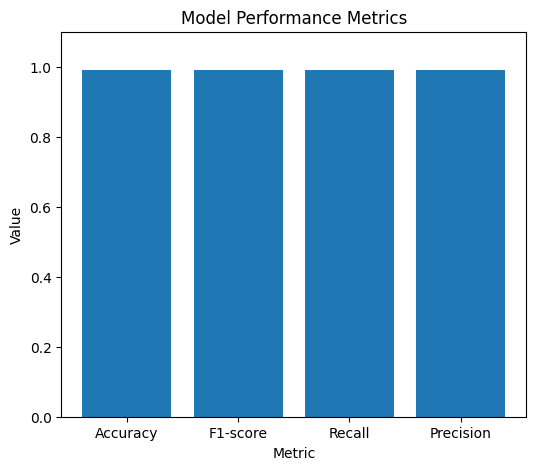

In [31]:
metrics = {
    'Accuracy': 0.99,
    'F1-score': 0.99,
    'Recall': 0.99,
    'Precision': 0.99
}
plt.figure(figsize=(6, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.1)  
plt.show()

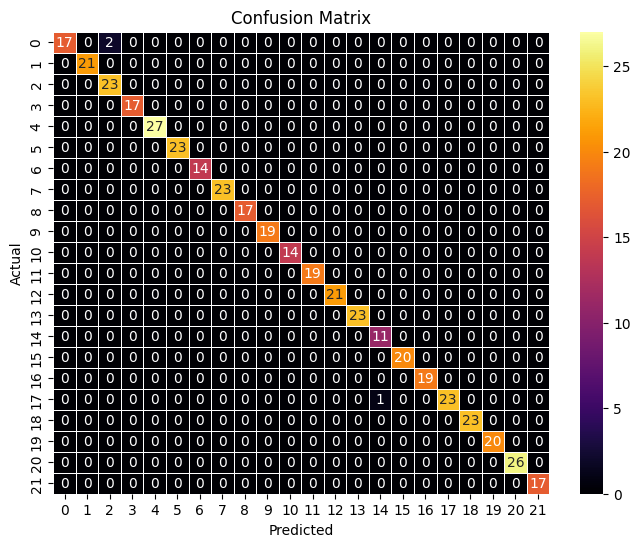

In [32]:
conff_mat = confusion_matrix(Y_test, y_pred)

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conff_mat, annot=True, fmt='d', cmap='inferno', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving The Model

In [33]:
pickle.dump(rf,open('rf_model.pkl','wb'))

# Load Model

In [34]:
rf = pickle.load(open('rf_model.pkl','rb'))